In [16]:
import ffmpeg
import numpy as np
import matplotlib.pyplot as plt

In [5]:
in_file = './vtest.avi'

In [20]:
probe = ffmpeg.probe(in_file)
video_stream = next((stream for stream in probe['streams'] if stream['codec_type'] == 'video'), None)
width = int(video_stream['width'])
height = int(video_stream['height'])
nb_frames = int(video_stream['nb_frames'])
print(height, width, nb_frames)

576 768 795


In [21]:
out, _ = (
    ffmpeg
    .input(in_file)
#     .filter()
    .output('pipe:', format='rawvideo', pix_fmt='rgb24')
    .run(capture_stdout=True, quiet=True)
)
video_array = (
    np
    .frombuffer(out, np.uint8)
    .reshape([-1, height, width, 3])
)

In [24]:
video_array.shape

(795, 576, 768, 3)

In [13]:
from PIL import Image

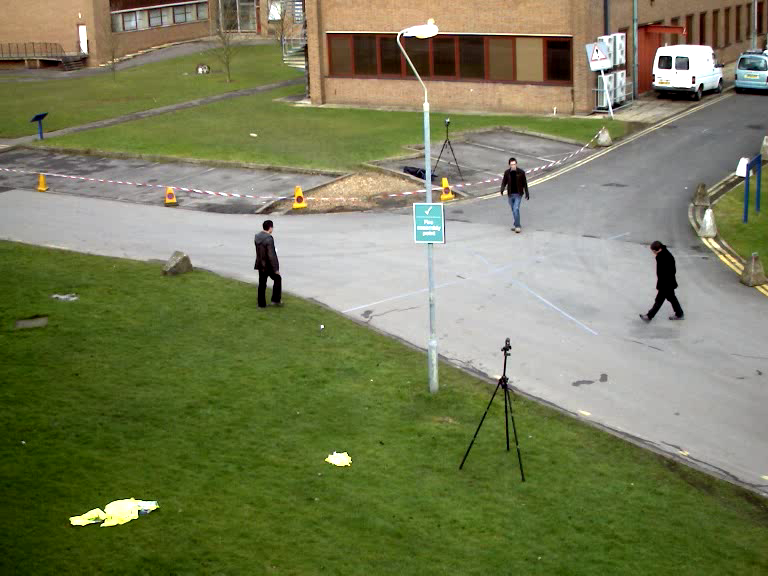

In [25]:
Image.fromarray(np.uint8(video_array[0])).convert('RGB')

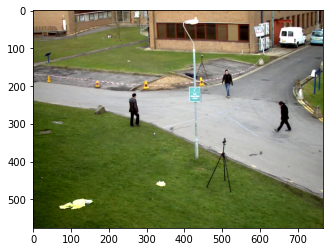

In [26]:
plt.imshow(video_array[0])